## Análise das vendas de produtos no Wish

Você foi contratado por uma empresa que planeja revender produtos no Wish. Seu objetivo vai ser ajudá-los a entender que fatores são os mais importantes para definir o sucesso de determinados produtos dentro da plataforma. Utilize as ferramentas estudadas até aqui para tirar insights e auxiliar a empresa do ponto de vista estratégico.

https://www.kaggle.com/datasets/jmmvutu/summer-products-and-sales-in-ecommerce-wish

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df_products = pd.read_csv("summer-products-with-rating-and-performance_2020-08.csv")
df_products.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


- Produtos com maior discrepância entre preço real e de retail vendem mais?
- Ad boost aumentam as vendas?
- Avaliações melhores aumentam vendas?


## 1. Análise da qualidade dos dados

In [34]:
df_products.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month'],
      dtype='object')

In [35]:
cols = ['title_orig', 'price', 'retail_price',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 
        'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner',
       'merchant_rating_count', 'merchant_rating', 'origin_country']

In [36]:
df_products = df_products[cols]

In [37]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   title_orig                   1573 non-null   object 
 1   price                        1573 non-null   float64
 2   retail_price                 1573 non-null   int64  
 3   units_sold                   1573 non-null   int64  
 4   uses_ad_boosts               1573 non-null   int64  
 5   rating                       1573 non-null   float64
 6   rating_count                 1573 non-null   int64  
 7   badges_count                 1573 non-null   int64  
 8   badge_local_product          1573 non-null   int64  
 9   badge_product_quality        1573 non-null   int64  
 10  badge_fast_shipping          1573 non-null   int64  
 11  tags                         1573 non-null   object 
 12  product_color                1532 non-null   object 
 13  product_variation_

### Análise de dados ausentes

In [38]:
df_products.isna().sum()

title_orig                        0
price                             0
retail_price                      0
units_sold                        0
uses_ad_boosts                    0
rating                            0
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
tags                              0
product_color                    41
product_variation_size_id        14
product_variation_inventory       0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner             1100
merchant_rating_count             0
merchant_rating                   0
origin_country                   17
dtype: int64

In [39]:
df_products.loc[df_products["product_color"].isna(), "product_color"] = ""
df_products.loc[df_products["product_color"].isna(), "product_color"] = ""
df_products.loc[df_products["product_variation_size_id"].isna(), "product_variation_size_id"] = ""
df_products.loc[df_products["has_urgency_banner"].isna(), "has_urgency_banner"] = 0

In [40]:
numerical_cols = df_products.describe().columns
categorical_cols = [i for i in cols if i not in numerical_cols]

In [41]:
numerical_cols

Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating',
       'rating_count', 'badges_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping',
       'product_variation_inventory', 'shipping_is_express',
       'countries_shipped_to', 'inventory_total', 'has_urgency_banner',
       'merchant_rating_count', 'merchant_rating'],
      dtype='object')

In [42]:
categorical_cols

['title_orig',
 'tags',
 'product_color',
 'product_variation_size_id',
 'origin_country']

## 2. Análise exploratória dos dados

### 2.1. Análise de distribuição dos dados

##### 2.1.1. Dados categóricos

In [43]:
categorical_cols

['title_orig',
 'tags',
 'product_color',
 'product_variation_size_id',
 'origin_country']

In [45]:
df_products["tags"] # deixar para depois

0       Summer,Fashion,womenunderwearsuit,printedpajam...
1       Mini,womens dresses,Summer,Patchwork,fashion d...
2       Summer,cardigan,women beachwear,chiffon,Sexy w...
3       Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...
4       Summer,Plus Size,Lace,Casual pants,Bottom,pant...
                              ...                        
1568    bohemia,Plus Size,dandelionfloralprinted,short...
1569    Summer,Panties,Elastic,Lace,Casual pants,casua...
1570    runningshort,Beach Shorts,beachpant,menbeachsh...
1571    Summer,fashion women,Fashion,Lace,Dresses,Dres...
1572    Summer,Leggings,slim,Yoga,pants,Slim Fit,Women...
Name: tags, Length: 1573, dtype: object

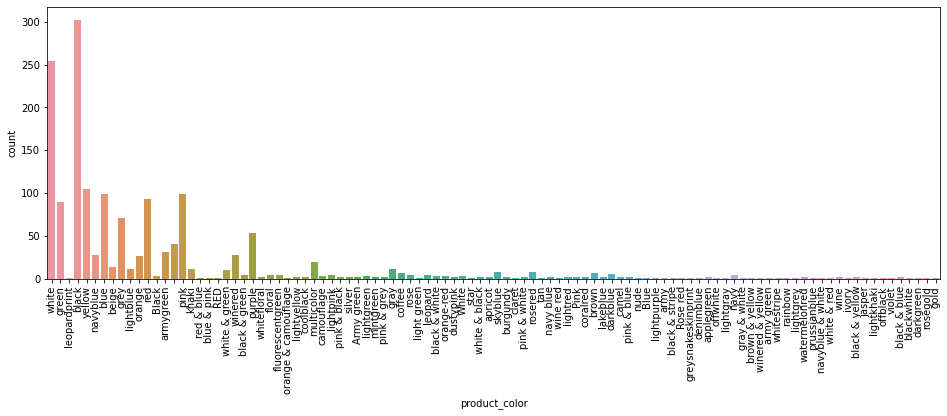

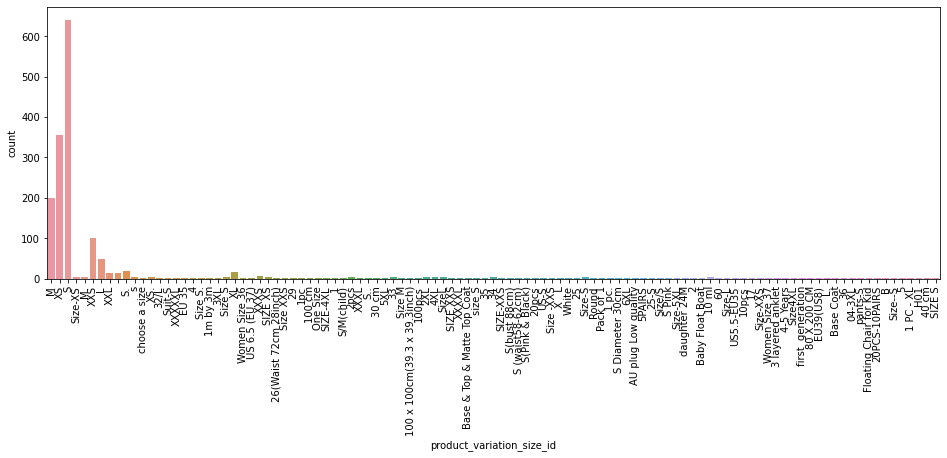

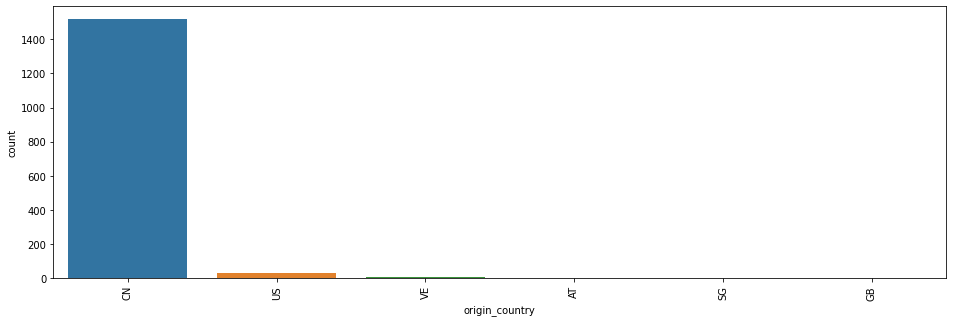

In [50]:
for col in categorical_cols:
    if col not in ['title_orig', 'tags']:
        fig, ax = plt.subplots(figsize=(16, 5))
        sns.countplot(x=col, data=df_products)
        plt.xticks(rotation=90)
        plt.show()

##### 2.1.2. Dados numéricos

In [51]:
numerical_cols

Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating',
       'rating_count', 'badges_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping',
       'product_variation_inventory', 'shipping_is_express',
       'countries_shipped_to', 'inventory_total', 'has_urgency_banner',
       'merchant_rating_count', 'merchant_rating'],
      dtype='object')

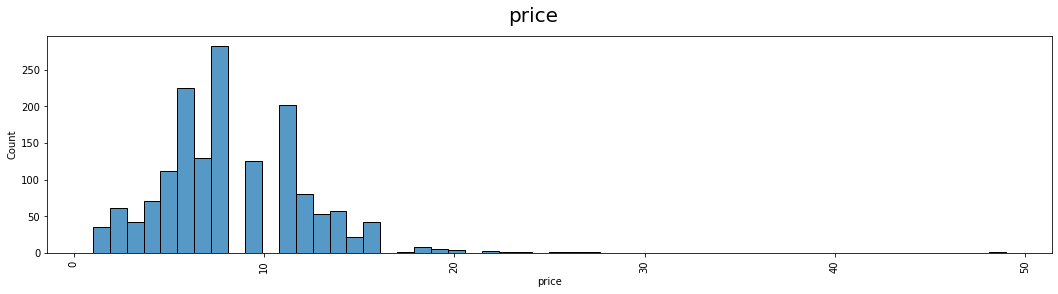

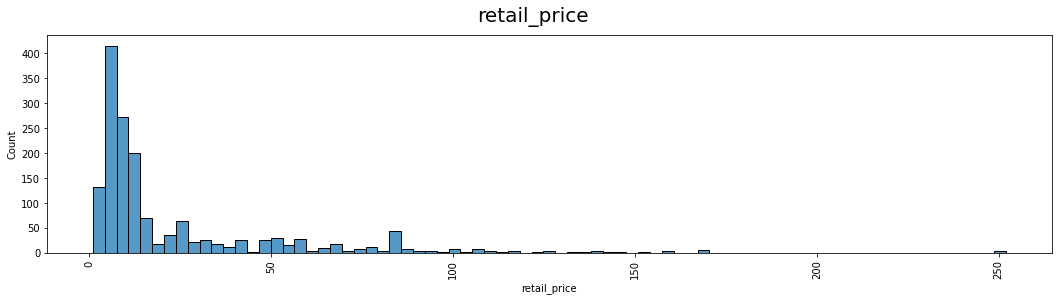

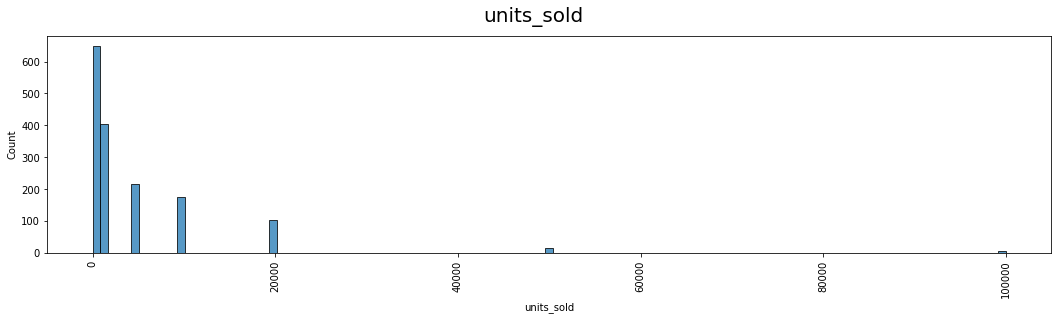

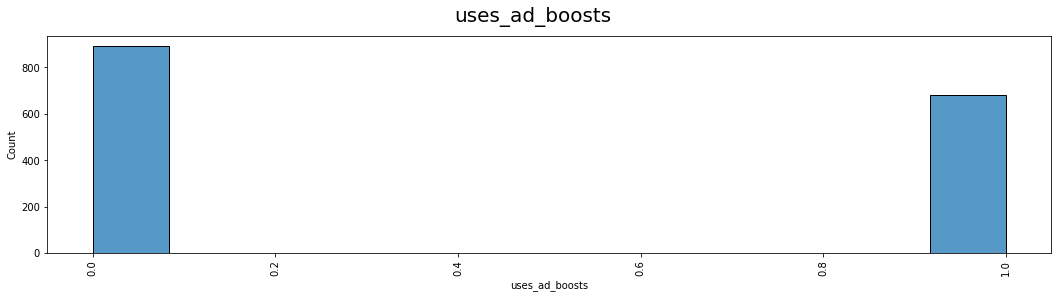

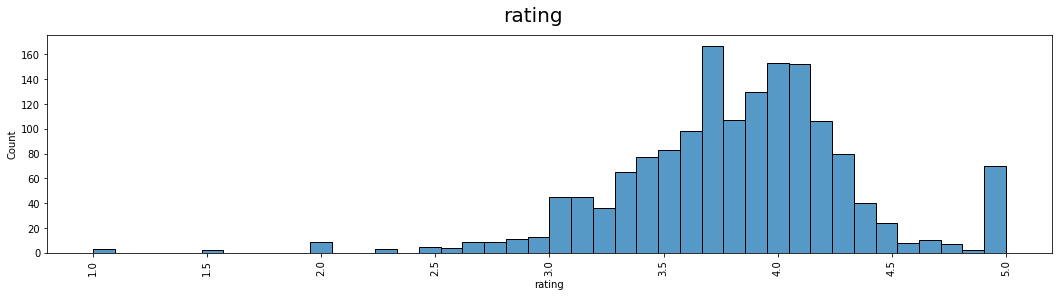

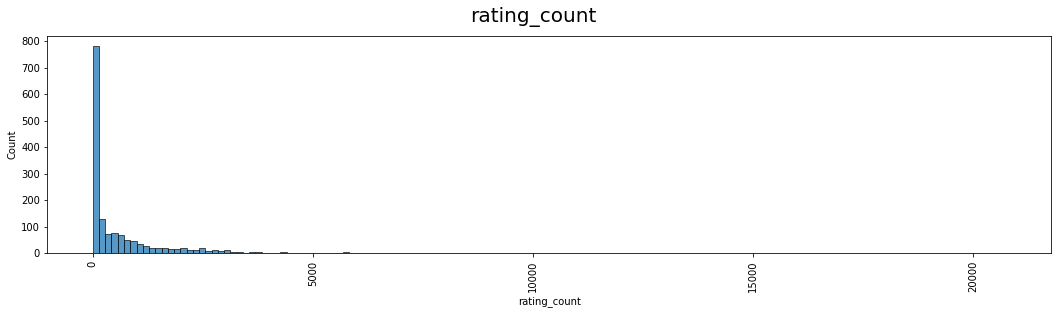

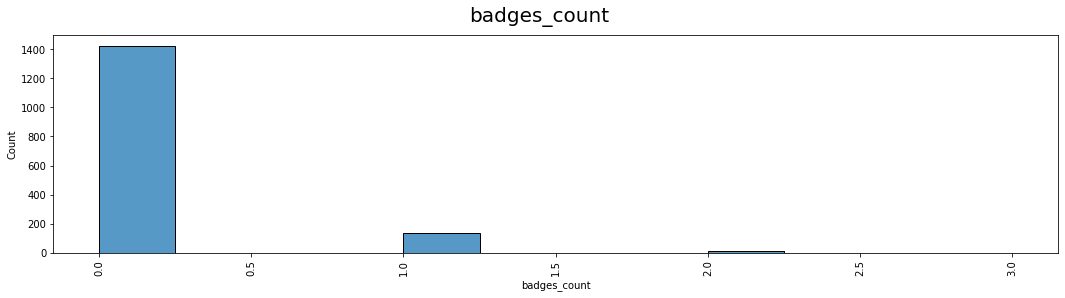

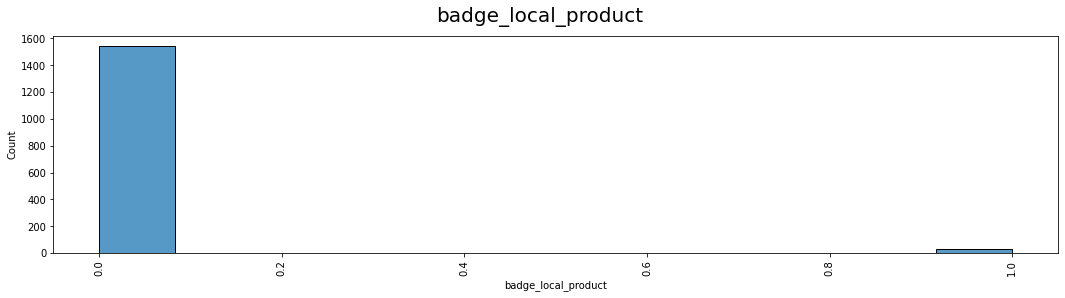

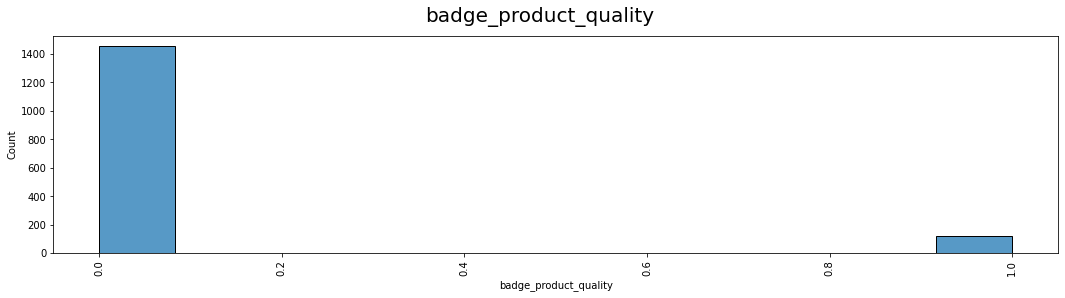

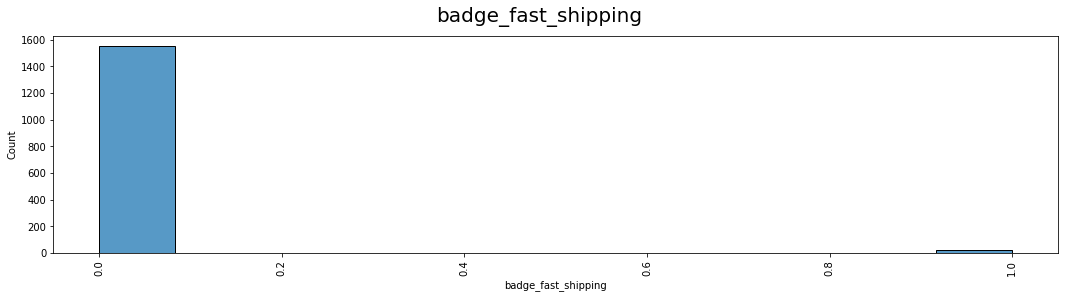

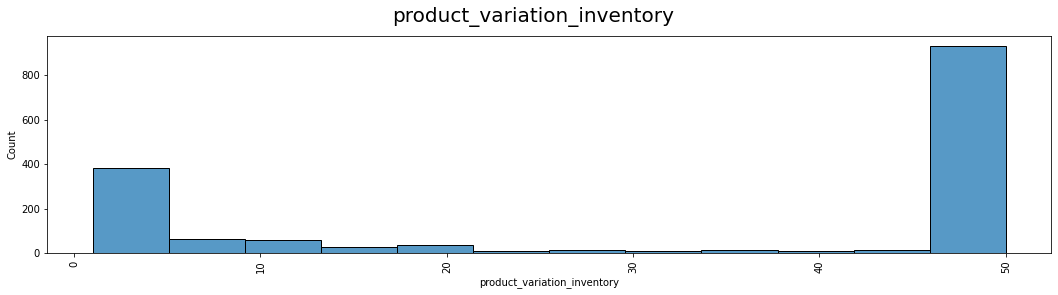

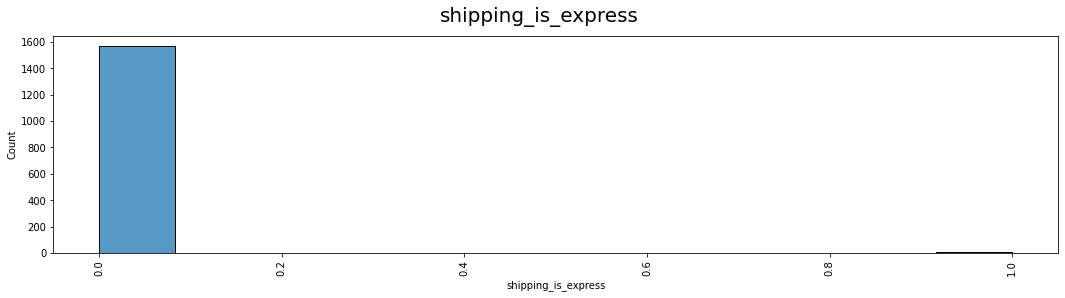

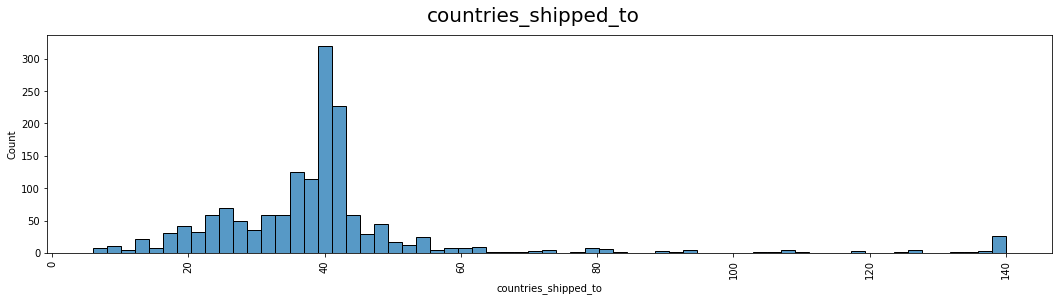

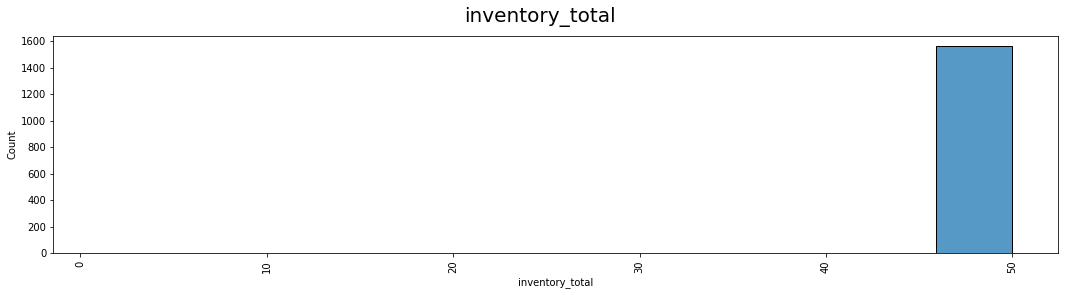

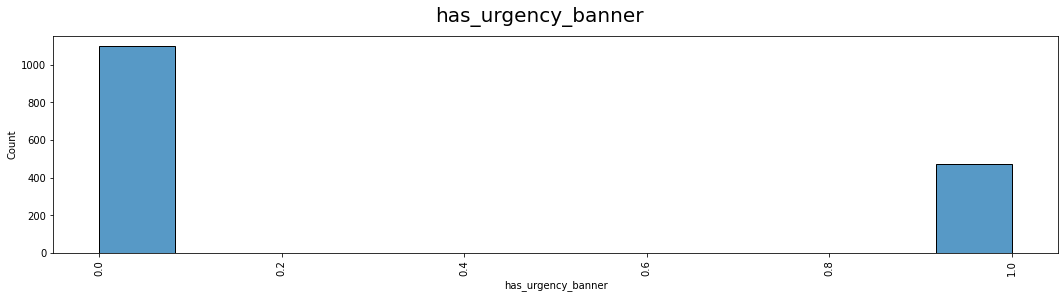

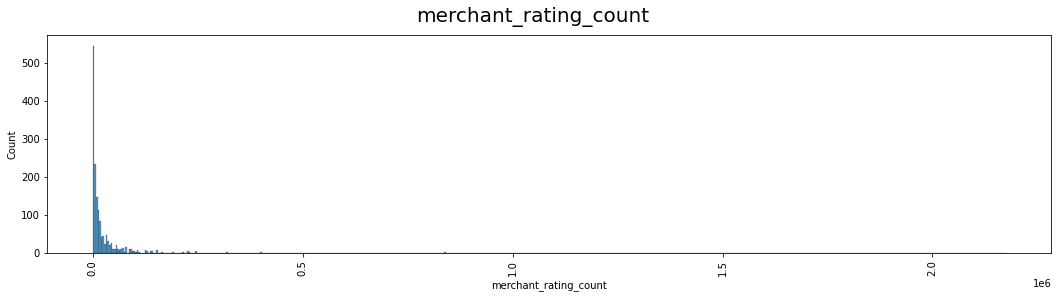

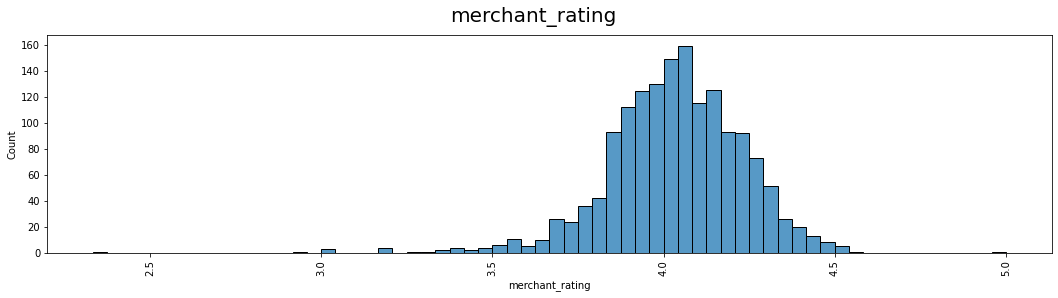

In [52]:
for col in numerical_cols:
    f, axes = plt.subplots(1,1,figsize=(18,4))
    sns.histplot(x=col, data=df_products)
    plt.xticks(rotation=90)
    plt.suptitle(col,fontsize=20)
    plt.show()

In [55]:
df_products.loc[df_products["units_sold"] < 10, "units_sold"] = 10
df_products["units_sold"].value_counts()

100       509
1000      405
5000      217
10000     177
20000     103
50         76
10         63
50000      17
100000      6
Name: units_sold, dtype: int64

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='units_sold', ylabel='Density'>

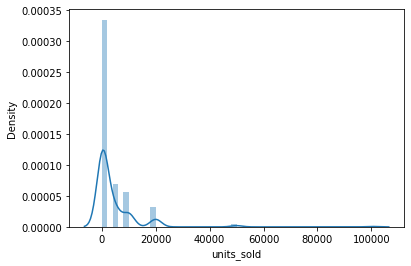

In [59]:
sns.distplot(df_products["units_sold"])

In [56]:
df_products["units_sold"].median() 

1000.0

In [57]:
df_products["units_sold"].mean() 

4339.052765416402

In [60]:
df_products["income"] = df_products["price"] * df_products["units_sold"]

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='income', ylabel='Density'>

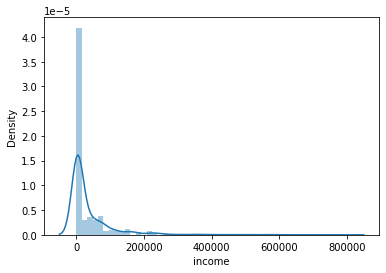

In [62]:
sns.distplot(df_products["income"])

In [63]:
df_products["income"].median() 

7000.0

In [64]:
df_products["income"].mean() 

35211.941703750796

In [68]:
from wordcloud import WordCloud, STOPWORDS

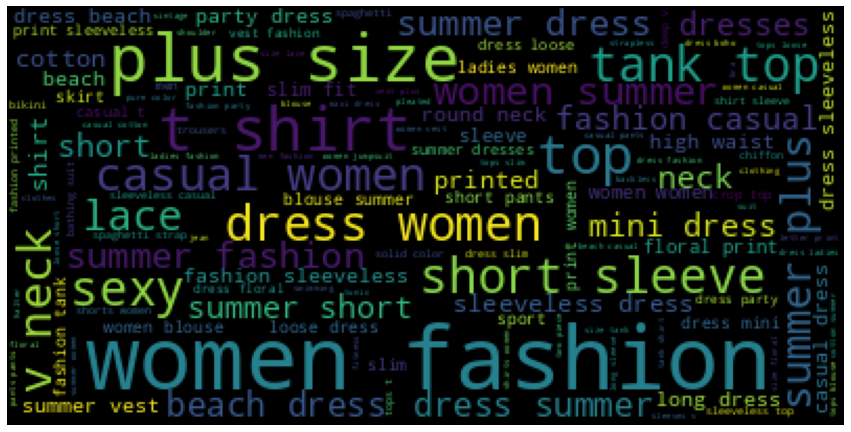

In [75]:
word_string = " ".join(df_products['tags'].str.lower())
wordcloud = WordCloud(stopwords=STOPWORDS).generate(word_string)

plt.subplots(figsize=(15,15))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [77]:
df_products["income"] = df_products["price"] * df_products["units_sold"]
df_products["income"].median()

7000.0

In [78]:
df_products["success"] = 0
df_products.loc[df_products["income"] > 7000, "success"] = 1

In [79]:
df_products["success"].value_counts()

0    809
1    764
Name: success, dtype: int64

#### Produtos com maior diferença entre "retail_price" e "price" vendem mais?**

In [80]:
df_products["discount"] = df_products["retail_price"] - df_products["price"]

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


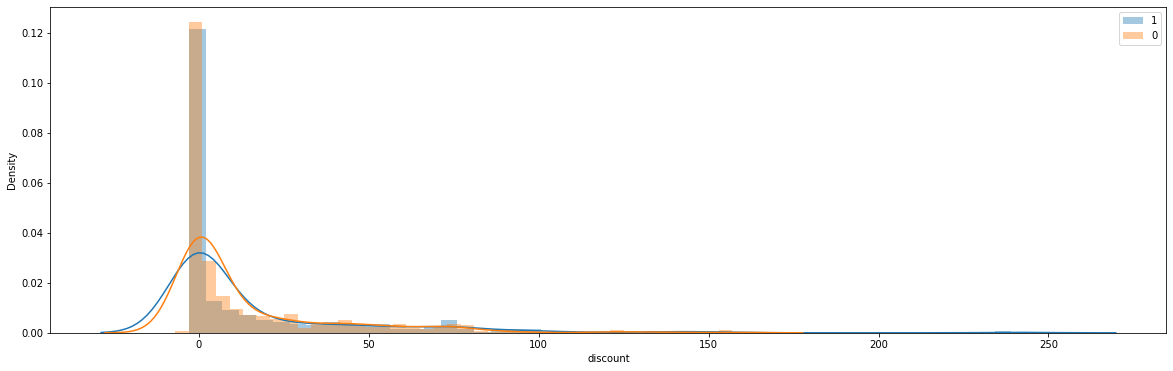

In [81]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.distplot(df_products.loc[df_products["success"] == 1, "discount"], label="1")
sns.distplot(df_products.loc[df_products["success"] == 0, "discount"], label="0")
plt.legend()

#### Ad boost aumentam as vendas?

In [86]:
df_products.loc[df_products["success"] == 0, "uses_ad_boosts"].value_counts() / df_products.loc[df_products["success"] == 0, "uses_ad_boosts"].value_counts().sum()

0    0.545117
1    0.454883
Name: uses_ad_boosts, dtype: float64

In [85]:
df_products.loc[df_products["success"] == 1, "uses_ad_boosts"].value_counts() / df_products.loc[df_products["success"] == 1, "uses_ad_boosts"].value_counts().sum()

0    0.590314
1    0.409686
Name: uses_ad_boosts, dtype: float64

#### Avaliações melhores aumentam vendas?

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


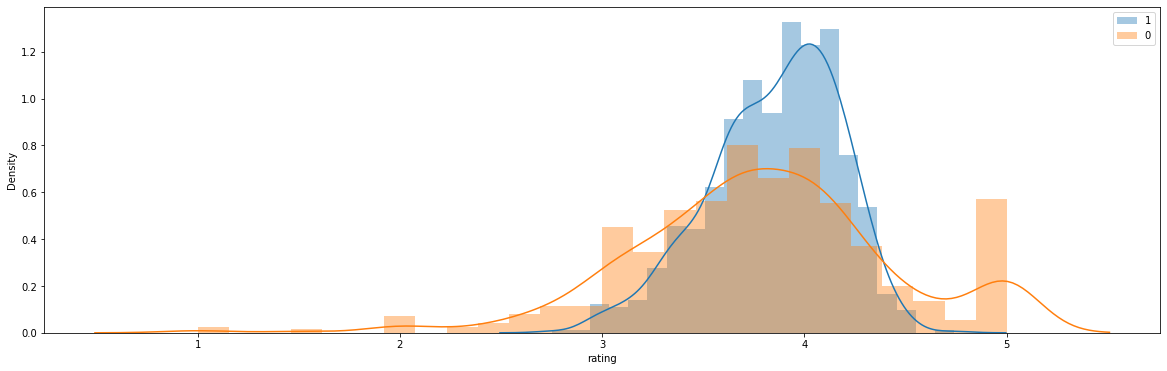

In [87]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.distplot(df_products.loc[df_products["success"] == 1, "rating"], label="1")
sns.distplot(df_products.loc[df_products["success"] == 0, "rating"], label="0")
plt.legend()

In [91]:
df_products.loc[df_products["success"] == 1, "rating"].median()

3.9

In [90]:
df_products.loc[df_products["success"] == 0, "rating"].median()

3.78

#### Badges importam?

In [95]:
df_products.groupby(["success", "badges_count"]).count()[["title_orig"]].pivot_table(index="success", columns="badges_count")

title_orig                
badges_count          0     1    2    3
success                                
0                 753.0  48.0  8.0  NaN
1                 669.0  90.0  3.0  2.0

In [101]:
df_products.groupby(["success", "badge_local_product"]).count()[["title_orig"]].pivot_table(index="success", columns="badge_local_product").fillna(0)

title_orig    
badge_local_product          0   1
success                           
0                          798  11
1                          746  18

In [102]:
df_products.groupby(["success", "badge_fast_shipping"]).count()[["title_orig"]].pivot_table(index="success", columns="badge_fast_shipping").fillna(0)

title_orig    
badge_fast_shipping          0   1
success                           
0                          795  14
1                          758   6

#### Quantidade de tags auxiliam vendas?

In [103]:
df_products["tags"]

0       Summer,Fashion,womenunderwearsuit,printedpajam...
1       Mini,womens dresses,Summer,Patchwork,fashion d...
2       Summer,cardigan,women beachwear,chiffon,Sexy w...
3       Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...
4       Summer,Plus Size,Lace,Casual pants,Bottom,pant...
                              ...                        
1568    bohemia,Plus Size,dandelionfloralprinted,short...
1569    Summer,Panties,Elastic,Lace,Casual pants,casua...
1570    runningshort,Beach Shorts,beachpant,menbeachsh...
1571    Summer,fashion women,Fashion,Lace,Dresses,Dres...
1572    Summer,Leggings,slim,Yoga,pants,Slim Fit,Women...
Name: tags, Length: 1573, dtype: object

In [104]:
df_products["tags_count"] = df_products["tags"].apply(lambda x: len(x.split(',')))

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


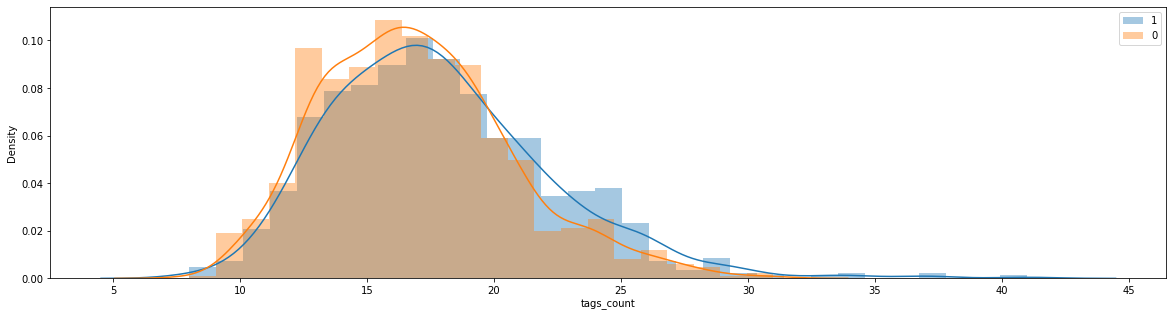

In [106]:
df_products["discount"] = df_products["retail_price"] - df_products["price"]

fig, ax = plt.subplots(figsize=(20, 5))
sns.distplot(df_products.loc[df_products["success"] == 1, "tags_count"], label="1")
sns.distplot(df_products.loc[df_products["success"] == 0, "tags_count"], label="0")
plt.legend()

## 3. Machine Learning (Opcional)

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
model_cols = ['price', 'retail_price', 
       'uses_ad_boosts', 'rating', 'badges_count',
       'badge_product_quality', 'badge_fast_shipping', 'product_variation_inventory',
       'shipping_is_express', 'countries_shipped_to', 'inventory_total',
       'has_urgency_banner', 
       'merchant_rating', 'discount', 'tags_count']

In [112]:
x = df_products[model_cols]
y = df_products["success"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [116]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestClassifier()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, 
                           return_train_score=True)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True)

In [117]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [118]:
rf_model = grid_search.best_estimator_

In [128]:
x_test.iloc[0].to_frame().transpose()

,price,retail_price,uses_ad_boosts,rating,badges_count,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating,discount,tags_count
562,9.0,8.0,1.0,3.88,0.0,0.0,0.0,50.0,0.0,39.0,50.0,1.0,4.098557,-1.0,19.0


In [131]:
rf_model.predict(x_test.iloc[1].to_frame().transpose())

array([0])

In [132]:
y_test.iloc[1]

1

In [133]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rf_model.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74       237
           1       0.75      0.67      0.71       235

    accuracy                           0.72       472
   macro avg       0.72      0.72      0.72       472
weighted avg       0.72      0.72      0.72       472

[[184  53]
 [ 78 157]]


<AxesSubplot:>

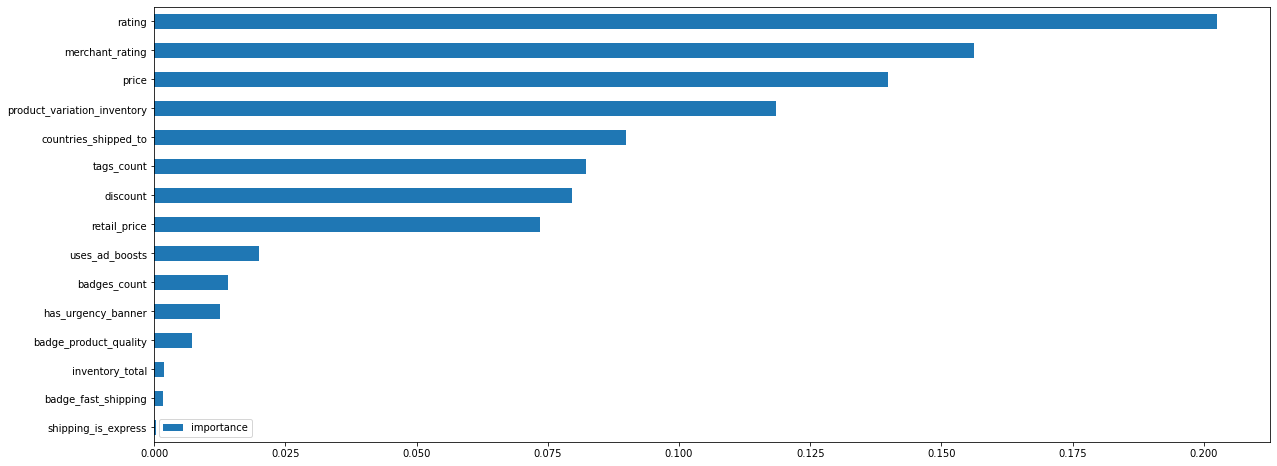

In [134]:
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index = x.columns,
                                    columns=['importance']).sort_values('importance', ascending=True)

fig, ax = plt.subplots(figsize=(20, 8))
feature_importances.plot(kind="barh", ax=ax)

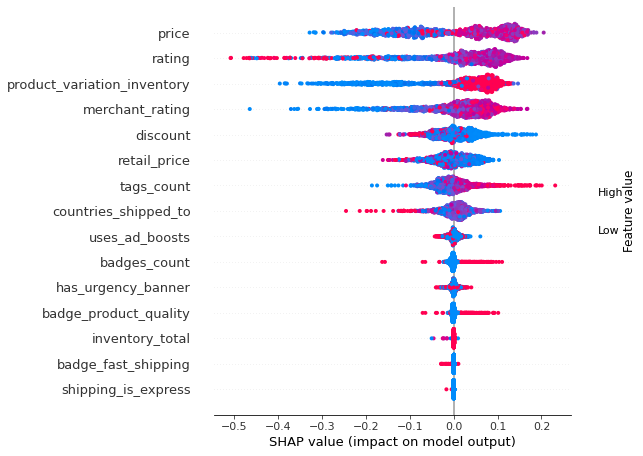

In [135]:
import shap

explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(x)
shap.summary_plot(shap_values[1], x)

## 4. Conclusões